In [1]:
import numpy as np
import sys
sys.path.append('../../functions/')
from statistics_functions import *
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/work/bk1377/a270230/'
path_stat = path + 'statistics/'
path_imgs = path + 'imgs/'

In [3]:
# load mean ice concentration, total ice covered area, mean ice thickness,
# and total ice volume for all years of the model run (1986 - 2100 for 4km,
# 2013 - 2020 & 2093 - 2100 for 1km)
[a_mean, area_total, h_mean, vol_total, years] = np.load(
    path_stat + f'ice_area_thickness_4km.npy', allow_pickle=True)

## calculate the monthly mean of mean sea ice thickness and sea ice concentration

In [4]:
def monthly_mean(var):
    
    startindices_of_months = (np.append(0, xticks))[:-1]
    endindices_of_months = xticks

    var_monthly_mean = []
    for year, var_y in zip(years, var):
        monthly_mean_y = []
        for startindex, endindex in zip(startindices_of_months, endindices_of_months):
            monthly_mean_y += np.nanmean([var_y[i] for i in range(startindex,endindex)]),
            
        var_monthly_mean += monthly_mean_y,

    return var_monthly_mean

In [5]:
a_mean_m = monthly_mean(a_mean)
h_mean_m = monthly_mean(h_mean)

## plot them grouped by seasons

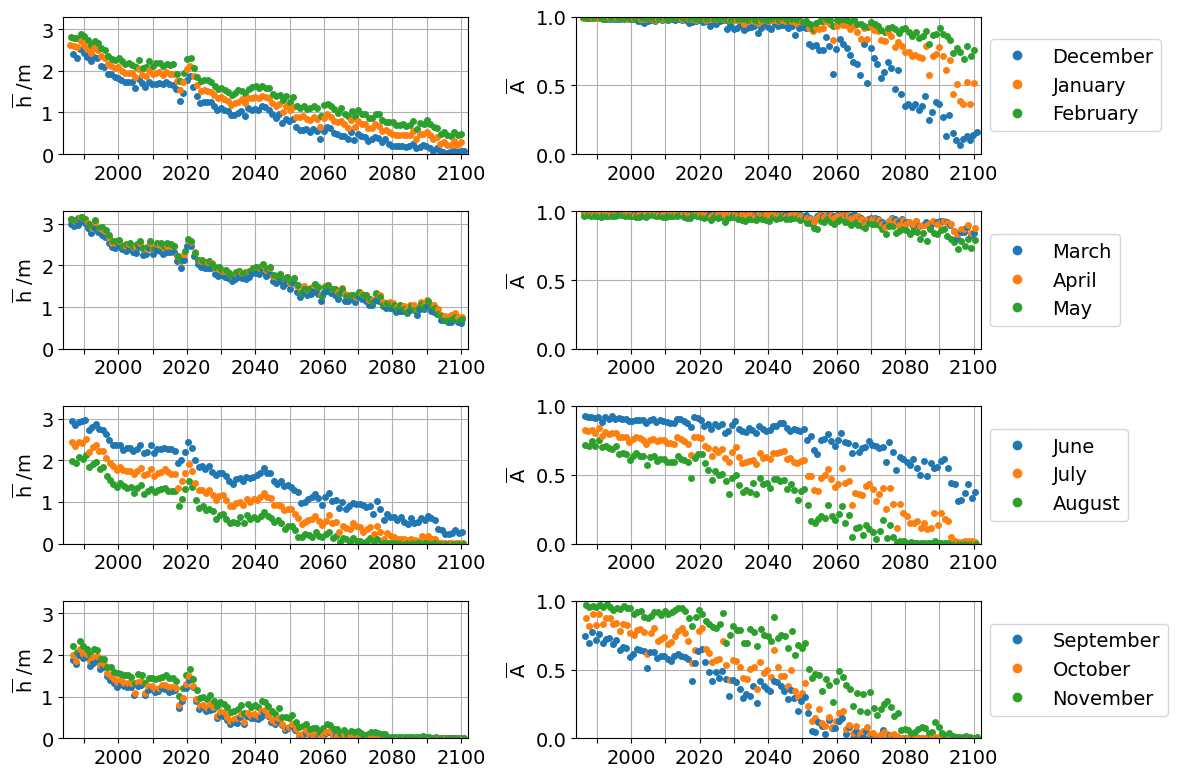

In [6]:
fig = plt.figure(figsize=(12,8))
axs = [fig.add_subplot(4,2,row) for row in np.arange(1,9)]

seasons = [[11,0,1],[2,3,4],[5,6,7],[8,9,10]]
years_xticks = np.arange(1980,2101,10, dtype='object')
years_xticks[1::2] = None

### plot mean ice thickness and concentration ###

for ax, season in zip(axs[::2], seasons):
    for i_year, variable_y in zip(years, h_mean_m):
        for i, i_month in enumerate(season):
            ax.plot(i_year+(i_month/12), variable_y[i_month], 'o', c=f'C{i}', markersize=4)

for ax, season in zip(axs[1::2], seasons):
    for i_year, variable_y in zip(years, a_mean_m):
        for i, i_month in enumerate(season):
            ax.plot(i_year+(i_month/12), variable_y[i_month], 'o', c=f'C{i}', markersize=4)


### decorate ###

for ax in axs[::2]:
    ax.set_ylabel(r'$\overline{\rm{h}}$ /m')
    ax.set_ylim([0,3.3])
    yticks=np.arange(4)
    ax.set_yticks(yticks,yticks)

handles = [Line2D([0], [0], marker='o', color=f'C{i}', linewidth=0) for i in range(4)]
for ax, season in zip(axs[1::2], seasons):
    ax.set_ylabel(r'$\overline{\rm{A}}$')
    ax.legend(handles, [month_strings[season[0]],
                        month_strings[season[1]],
                        month_strings[season[2]]],
              loc='center left', bbox_to_anchor=(1,0.5))
    ax.set_ylim([0,1])

for ax in axs:
    ax.set_xticks(np.arange(1980,2102,10),years_xticks)
    ax.set_xlim([1984,2102])
    ax.grid()

fig.tight_layout()
#plt.savefig(path_imgs + 'full_run.png', dpi=100, bbox_inches='tight')

## calculate and plot the seasonal mean values

In [18]:
seasons_months = [[11,0,1],[2,3,4],[5,6,7],[8,9,10]]

h_mean_season, a_mean_season = [], []
for i_year, _ in enumerate(years):
    
    tmp_h, tmp_a = [], []
    for season in seasons_months:
        
        tmp_h += sum(h_mean_m[i_year][month] for month in season) / len(season),
        tmp_a += sum(a_mean_m[i_year][month] for month in season) / len(season),
    h_mean_season += tmp_h,
    a_mean_season += tmp_a,

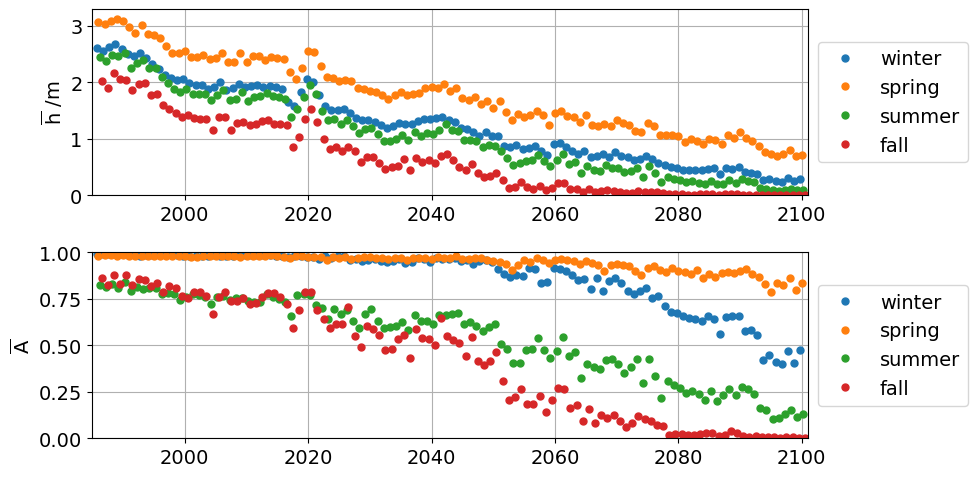

In [29]:
fig, axs = plt.subplots(2,1, figsize=(10,5))

variable = 'total length'
seasons = ['winter', 'spring', 'summer', 'fall']
labels = [r'$\overline{\rm{h}}$ /m', r'$\overline{\rm{A}}$']
ylims = [[0,3.3], [0,1]]

for ax, var, label, ylim in zip(axs, [h_mean_season, a_mean_season], labels, ylims):
    for season in range(4):
        for i_year, year in enumerate(years):
            im, = ax.plot(int(year)+(season-1)/4, var[i_year][season],
                   'o', markersize=5, color=f'C{season}')
        im.set_label(seasons[season])

    ax.set_ylabel(label)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
    ax.set_xlim([1985,2101])
    ax.set_ylim(ylim)
    ax.grid()

fig.tight_layout()